# DS06 - Data Science with Python

## Advanced regression techniques

**Author**: Philip Wilkinson, Head of Science (21/22), UCL DSS

**Date** 20th October 2021

***Proudly presented by the UCL Data Science Society***

### Introductoion

Welcome to the Workshop on Advanced Regression techniques presented by the UCL Data Science Society. This builds on the foundation laid by the [Introduction to Regression workshop](https://github.com/UCL-DSS/linear-regression-workshop). In doing so, this coveres the topics of:

1. [Linear regression recap](lrr)
2. [Lasso regression](lr)
3. [Ridge regression](rr)
4. [Elastic net regression](enr)
5. [Decision tree regression](dtr)
6. [Random forest regression](rfr)

The dataset that we use comes from [this source](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#) and focuses on energy efficiency of buildings based on simulated building layouts. More information on the dataset can be found in the relevant paper (link at the end of the workbook) but for our purposes the dataset has eight main attrubtes and two potential response. These are:

- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

We can thus take a look at the data before we perform an regressions:

In [3]:
import pandas as pd

#read in the dataset
data = pd.read_csv("data/ENB2012_data.csv")
#remove any data that doesn't have any information attached
data.dropna(thresh = 3, inplace = True)
data.dropna(axis = 1, inplace = True)
#rpint out the data
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


Before we start, you can use some of the knowledge gained from previous workshops ([notably the visualisation one](https://github.com/UCL-DSS/matplotlib-workshop)) to explore the dataset in more information)

However, as before, and as with most models that we create, we will split the dataset into a training and test set, so that we can see how well the model performs on unseen data:

In [4]:
#import the necessary data 
from sklearn.model_selection import train_test_split

#remove the necessary target columns
X = data.drop(columns = ["Y1", "Y2"])
#set Y1 as our target
y = data[["Y1"]]

#create the training and test dataset
X_train, X_test, y_train, y_test = (
    train_test_split(X, y , test_size = 0.3, random_state  = 42)
)

## Bias

Bias is the amount by which models predictions different from the actual target value in comparison to the training data. A high level of bias can lead to underfitting which occurs when the algorithm is unable to capture relevant relations between the existing features and target values. The opposite however is when there is no, or little, bias on the training data whereby we have overfitting on our existing data,

## Variance

Variance indicates the alteration in target function when new data is used to generate predictions. This can be referred to as the error associated with testing unseen data. Variance does not focus on overall ccuracy but instead simply measures the spread, or uncertainty, in model estimates.

## Bias-variance trade-off

During modelling phase it is necessary to make decisions about the level of bias and variance in the models. When building a supervised machine learning model, the goal is to achieve low bias and variance for the most accurate predictions. This means that we have to deal with the underfitting and overfitting problem. 

In this way, we can think of bias as how accurate the model (i.e. closeness to the target) while varince is how bunched together the predictions are in relation to the target. We aim to have both low bias (i.e. accurate), and low variance (i.e. consistently accurate), but there is often a trade-off between the two when we train the model. For example, in the case of overfitting the training data, we may be very accurate with the training data and so have low bias, but we will likely have high variance on unseen data as it has overfitted. However, we can reduce the degree of overfitting to allow the model to generalise the overall trends better, increasing the bias in the model potentially, in order to reduce the variance on unseen data. Thus, there is a degree of trade-off between the two.

We can envision this as follows:


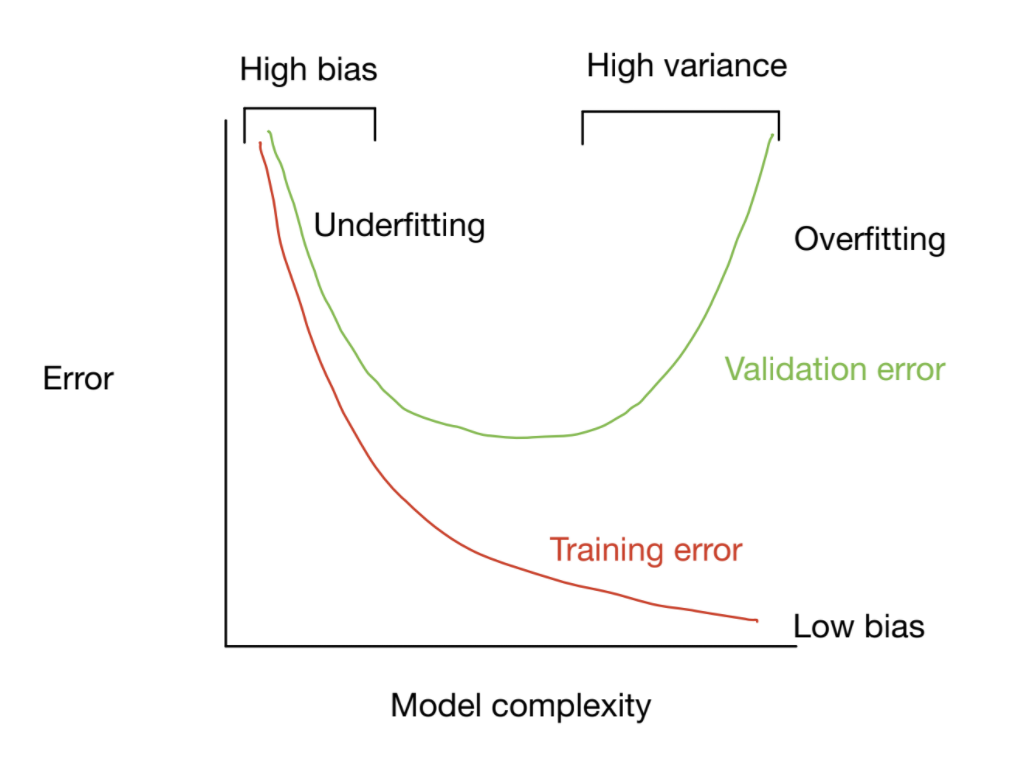


Where we are trying to achive that middle ground of as low a validation error as possible on new dataset, without going too far towards the low training error.

<a id="lrr"></a>

## Linear regression

The previous workshop showed us how Linear regression works whereby we are aimining to reduce the sum of squared error from the model, thus the model works to reduce the following equation:

\begin{equation}
RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}

(Remember RSS means residual sum of squares)

While this may be unbiased (relatively accurate on the test dataset), it can have large variance in cases where there are many predictors or the predictor variables are highly correlated with each other. We have already seen last week how we deal with potentially correlated independent variables (through a correlation matrix of VIF to remove variables before regression). However the other solution is through regularisation, which aims to reduce variance (the variance in the prediction of unseen data) at the cost of introducing some bias into the model. This is able to do so by adding some more information into the model and is is often overall beneficial to the predictive performance of the model.

For now, however, we can see how well basic Linear Regression performs on our dataset as it currently is:

In [5]:
#import the model
from sklearn.linear_model import LinearRegression

#create the regression
reg = LinearRegression().fit(X_train, y_train)

Once the regression has been fitted to the training data, we can then examine how well it performs against the data it trains against. We expect this to be high because we already know that the dataset has been designed that way and this is the data that it trains on:

In [6]:
reg_R2 = reg.score(X_train, y_train)
print(reg_R2)

0.9171499705272056


This shows the $R^2$ which indicates how much variation in the data is explained by the model and as we can see the value is over 0.9, indicating a good overall fit. 

We can see how the model has done this by exactracting the coefficients from the regresssion:

In [7]:
#create a dataframe of the regression coefficients
reg_coefs = pd.DataFrame({"var":X_train.columns.values,
                          "coef":reg.coef_[0]})
#show the dataframe
reg_coefs

,var,coef
0,X1,-6.378471e+01
1,X2,3.771506e+11
2,X3,-3.771506e+11
3,X4,-7.543013e+11
4,X5,4.125312e+00
5,X6,-2.333829e-02
6,X7,1.992648e+01
7,X8,2.305140e-01


What this shows us is the size and direction of the relationship between the independent variables and the dependent variables where we can see that X2-X4 have large effects, however this does not neccessarily tell us the significance of the relationship or which variables are important (if you want to know that then you can use statsmodels as below)

In [8]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_sm).fit()
est.summary()

C:\Users\phili\anaconda3\envs\DSS\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     838.7
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          1.16e-281
Time:                        15:19:08   Log-Likelihood:                -1333.3
No. Observations:                 537   AIC:                             2683.
Df Residuals:                     529   BIC:                             2717.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6807     22.495      3.676      0.000      38.490     126.871
X1           -63.8719     12.182     -5.243      0.000     -87.802     -39.942
X2            -0.0620      0.016     -3.919      0.000      -0.093      -0.031
X3             0.0372      0.005      8.085      0.000       0.028       0.046
X4            -0.0496      0.009     -5.578      0.000      -0.067      -0.032
X5             4.1255      0.401     10.285      0.000       3.338       4.913
X6            -0.0236      0.114     -0.207      0.836      -0.248       0.201
X7            19.9267      0.962     20.723      0.000      18.038      21.816
X8             0.2307      0.083      2.767      0.006       0.067       0.395
==============================================================================
Omnibus:                       15.777   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.927
Skew:                           0.056   Prob(JB):                     7.08e-08
Kurtosis:                       4.208   Cond. No.                     6.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.91e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Which shows us that only the X6 variable does not appear to be significant in this relationship. 

However, proceeding on the basis of the original model, we can use this model to predict unseen data from the dataset to examine whether the original model has over or underfitted. If the model was to overfit, then we would see it struggle to predict the unseen data because it has learn the nuances of the training data too much, while if the model was to underfit it would also struggle to predict the new test data. 

In [9]:
#predict the data
reg_predict = reg.predict(X_test)
#examine the predictions
reg_predict

array([[18.76006989],
       [13.9663192 ],
       [31.15215145],
       [35.86711684],
       [15.29077304],
       [28.6389732 ],
       [24.9203539 ],
       [27.93266479],
       [17.61154181],
       [27.5439572 ],
       [18.00255503],
       [34.30572125],
       [27.70445638],
       [ 8.59481447],
       [18.53359798],
       [36.83366577],
       [37.50186961],
       [11.35327304],
       [15.18580585],
       [34.28238296],
       [34.38640438],
       [35.22225129],
       [10.93067001],
       [29.9358482 ],
       [12.53231447],
       [29.91250991],
       [33.26805009],
       [34.31638951],
       [14.6225692 ],
       [15.70108242],
       [ 7.92661063],
       [10.84556838],
       [15.06025899],
       [30.93640368],
       [29.17429121],
       [27.88598822],
       [30.85162254],
       [29.19762949],
       [33.2447118 ],
       [ 8.93067001],
       [28.57753035],
       [11.37661133],
       [ 6.70750756],
       [32.37888951],
       [ 7.41834585],
       [ 6

We can see that we have been able to predict the test data, but of course we want to see how well is has performed in terms of the same metric as we scored the training data. We can run this as:

In [10]:
print(reg.score(X_test, y_test))

0.9125282369870786


What we can see from this is that the basic linear model has performed well at both the training and test level, which suggests that this model is okay for predicting new data as not a lot of explanatory power is lost. 

While this may be the case for this dataset and this model however, it won't necessarily be the case for all datasets that we encounted. Thus, with that in mind we can then try to use other models, that perform regularisation and feature selection for us, here to see how they work and thus be able to understand when to use them in practice in the future.

<a id = "lr"></a>

## Lasso regression

Lasso regression is short for <b>least absolute shrinkage and selection operator</b> and is a regression method that performs both variable selection and regularisation to be able to increase the prediction accuracy and interpretability of the regression model. 

We have already seen what variable selection is all about in the previous workshop in linear regression whereby we removed variables according to their correlation with each other or their lack of significance in the regression. This therefore improves the effectiveness of the model by only using variables that are important to our target variable and those that actually have a relationship with the target variable, thereby improving both the effectiveness and efficiency of our model.

In contrast, regularisation attempts to solve the issue of overfitting. What is overfitting? Overfitting is where the model trains on the training data, performing well on it, but then struggles when it is introduced to new data beyond that which it is trained on. Regularisation attempts to solve this by introducing a punishment, or constraint, in order to avoid the model overtraining on the data that it works on. Lasso regression is one way of doing this by using so called "L1 Regularisation". Here, a penalty term is added to the ordinary least squares regression objective (Reducing the sum of squares) such that the regression objective becomes:

\begin{equation}
RSS_{LASSO} (w, b) = \sum_{i=1}^N (y_i -(w \cdot x_i + b))^2 + \alpha \sum_{j=1}^p  | w_j | 
\end{equation}

The penalty introduced here, given by the second part of the equation, is equivalent to the <b>sum of the absolute values</b> of the coefficients. This means that a subset of the coefficients are forced to be precisely zero (i.e. some $\beta$ values are forced to be 0), acting an automatic feature selection whereby those with a zero coefficient are ignored in the model. This means that only a subset of the most important features are left with non-zero weights, making the model effectively easier to interpret.

The extent of this however is controlled by the $\alpha$ paramater, meaning that we can control the tradeoff between under and overfitting to find a cosy middle ground. This is because, as $\alpha$ increases, it reduces the values of the coefficients and reduces the variance (avoiing overfitting), but after a certain value then the model begins to loose important understanding of the data and increases bias (leading to underfitting). Thus, the value of $\alpha$ should be carefully selected by using hyperparamater tuning or cross vlidation.

For now however, we can implement a simple Lasso regression, in a way that is pretty similar to how we implemented the basic linear regression:

In [11]:
#import the linear model class
from sklearn import linear_model

#initiate the model with an alpha = 0.1
lasso_model = linear_model.Lasso(alpha = 0.1)
#fit the model to the data
lasso_model.fit(X=X_train, y=y_train)

Lasso(alpha=0.1)

We can see above that implementing a lasso regression model follows pretty much the same syntax as for implementing a lineaer regression. However, when creating this we had to specify the alpha value for implementation (the default being 0.1), which as we known affects the penalty applied to the cefficients. 

In this case, as before, we can examine the coefficients from the model by exacting them from the model implementation as follows:

In [12]:
#extract the coefficients
df_coef_lasso = pd.DataFrame({"var": X_train.columns.values, 
                              "coef":lasso_model.coef_})
#show the dataframe
df_coef_lasso

,var,coef
0,X1,-0.000000
1,X2,0.001935
2,X3,0.050211
3,X4,-0.000000
4,X5,4.823518
5,X6,-0.000000
6,X7,14.491866
7,X8,0.291431


From this we can see that our coefficients appear slightly different to the original, linear regression, model and that some of these coefficients have effectively been reduced to 0. This means that the penalty introduced, in order to avoid overfitting, has meant that some variables (in this case X1, X4 and X6) are no longer important in the regression equation. With this in mind then, knowing that the model has reduced complexity in the regression equation to avoid overfitting, we can examine the score of the model on the training dataset:

In [13]:
lasso_model.score(X_train, y_train)

0.9068673512124443

We can see from this score in that although it may be lower than the original model it has managed to achieve this score with fewer explicit variables in the model. In some cases, this may lead to an improved adjusted $R^2$ (although admittedly not in this case) due to reducing the model complexity required to reach the same level of predictive power. 

With this in mind, we can us the model to predict the test dataset as we did before:

In [14]:
lasso_model.predict(X_test)

array([18.97708071, 13.66525464, 31.59991728, 34.58876544, 15.81713996,
       28.9636137 , 26.9609264 , 29.13470629, 17.1166265 , 28.57736053,
       17.69948873, 33.97915955, 28.86879164,  8.82442329, 18.28235096,
       35.5700772 , 36.44437055, 10.70677205, 13.57528168, 33.97915955,
       33.01974234, 33.71447209, 11.49147476, 30.24120567, 13.9347912 ,
       30.24120567, 32.63348917, 33.01974234, 14.94284662, 16.80330082,
        7.95012994, 10.12390982, 15.52570885, 30.26310023, 29.36691233,
       29.13470629, 31.30848617, 29.36691233, 32.63348917,  8.9362908 ,
       30.00899963, 10.70677205,  7.1956731 , 31.74215037,  8.47326508,
        7.1956731 ,  9.75085706,  8.9362908 , 28.98550825, 31.33400264,
       32.92492029, 14.8309791 , 13.95668575, 32.41498555, 12.27579514,
       13.64336008, 10.12390982, 31.42882469, 38.32671931, 35.86150832,
       15.727167  , 19.55994294, 14.8309791 , 29.25504481, 30.00899963,
       30.24120567, 30.24120567, 11.49147476, 14.92095206, 10.41

And check how well the model did on that new dataset:

In [15]:
#R2 score
lasso_model.score(X=X_test, y=y_test)

0.9036176174398927

While in this case the lasso model has not improved the models ability to predict unseen data (as the $R^2$ is lower), we can begin to see how the model may do better when we are working with more complex datasets in the future. This is especially so, as already mentioned, when we have independent variables that are correlated with each other or that we have a large amount of independent variables to deal with.

Another important thing as well, is that while we chose alpha = 0.1, this is not necessarily the optimimum value for alpha and we can see how the coefficients change over different penalty values over the life of the model. For this we can select different alpha values and see that as the penalty increases (alpha increases) that more and more coefficients are reduced to zero.

C:\Users\phili\anaconda3\envs\DSS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3392.8362225630335, tolerance: 31.565218279999996
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\phili\anaconda3\envs\DSS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2380.3107569991107, tolerance: 31.565218279999996
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\phili\anaconda3\envs\DSS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2349.5384099726393, tolerance: 31.565218279999996
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\phili\anaconda3\envs\DSS\lib\site-packages\sklearn\l

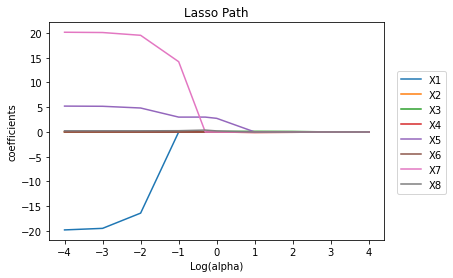

In [16]:
#import the necessary modules
from itertools import cycle
from sklearn.linear_model import lasso_path
import numpy as np
import matplotlib.pyplot as plt

#run the lasso path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train.values.reshape(-1),
                                          alphas = [.0001, .001, .01,.1, .5, 1, 10, 100, 1000, 10000], 
                                          fit_intercept=False)


#plot the coefficients over the path
log_alphas_lasso = np.log10(alphas_lasso)
for index, coef_l in enumerate(coefs_lasso):
    l1 = plt.plot(log_alphas_lasso, coef_l,
                 label = X_train.columns.values[index])

    #add labels
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

plt.legend(bbox_to_anchor = (0.7, 0.3, 0.5, 0.5))
#sho the model
plt.show()

What this shows is how the coefficients of the model vary over the range of possible alpha values whereby a small alpha means that several variables still have influence in the model, as can be seen with X1, X7 and X6 early on in the model. 

We can then start to also examine which alpha provides the best fitting model also, which if you want to know more you can go [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py).

<a id = "rr"></a>

## Ridge regression

Ridge regression is also able to perform regularisation on the dataset to be able to control both over and underfitting in the model. This does so by using the following equation:

\begin{equation}
RSS_{RIDGE}(w, b) = \sum_{i=1}^N (y_i - (w \cdot x_i + b))^2 + \alpha \sum_{j=1}^p w_j^2
\end{equation}

The power of Ridge Regression is that it minimises the RSS by enforcing the coefficients to be lower (in effect introducing a penalty), but it does not enforce them to be zero (as in Lasso regression). The effect of this penalty, as seen above, is effectively the <b>square of the magniture</b> of the coefficients. This therefore uses the other version of regularisation known as L2 regularisation.

This therefore leaves the choice of the $\alpha$ paramater which can be done several ways. The more traditional, statistical approach, would be to choose $\alpha$ that would reduce some information criteria, such as AIC or BIC. The alternative would be to perform cross-validation and selection the $\alpha$ value that would minimise the cross-validest sum of squared residuals (or some other measure). While the former approach emphasizes the model's fit to the data, the latter is more focused on its predicted performance.

Therefore, as we have done for linear regression we can implement Ridge regression with almsot the same syntax as before:

In [17]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train, y_train)

Ridge()

Now that thel model has been fit, we can examine how it has worked by looking at the coefficients:

In [18]:
df_coef_ridge = pd.DataFrame({"var": X_train.columns,
                              "coef":ridge_model.coef_[0]})
df_coef_ridge

,var,coef
0,X1,-3.648339
1,X2,0.012609
2,X3,0.035442
3,X4,-0.011416
4,X5,5.307185
5,X6,-0.008634
6,X7,18.218816
7,X8,0.269722


From this we can see the main differrence between this and the original Lasso regression is that, although the some of the coefficients have come close to 0, they have not actually reached zero. This is because the penalty does not reduce them all the way, and indeed never will, despite how much we may increase the alpha paramater. This means that feature selection is not performed with this model, depsite the penalty being introduced.

We can then see how the model has performed on our dataset:

In [49]:
ridge_model.score(X_train, y_train)

0.9128636836305432

Where we can see that the model has performed better than the Lasso regression, but still has performed worse than the base linear regression.

We can see how it then works on unseen data by examining the predictions:

In [50]:
ridge_model.predict(X_test)

array([[19.50842818],
       [13.73574341],
       [31.71676819],
       [35.52411655],
       [15.78648348],
       [28.78904751],
       [25.97276733],
       [28.71422413],
       [17.71877538],
       [27.88930839],
       [18.23231553],
       [33.3787685 ],
       [28.1331269 ],
       [ 8.24957775],
       [18.79766191],
       [35.57214766],
       [36.37267819],
       [10.71267855],
       [14.20138501],
       [33.37013413],
       [33.98497074],
       [34.7322204 ],
       [10.98565224],
       [30.07574044],
       [13.32338268],
       [30.06710606],
       [33.07659724],
       [33.95906762],
       [14.98595295],
       [16.74970264],
       [ 7.44904723],
       [10.15596654],
       [15.51676184],
       [30.71270504],
       [29.24067242],
       [28.69695538],
       [31.42114344],
       [29.24930679],
       [33.06796287],
       [ 8.44874978],
       [29.50612028],
       [10.72131292],
       [ 6.35714652],
       [32.6358913 ],
       [ 7.61599043],
       [ 6

And then the score:

In [51]:
ridge_model.score(X_test, y_test)

0.9085287497226727

Like before, knowing that the model is working on unseen data, the performance of the model drops. However this is to be expected. 

However, we know that we just selected a single alpha value for the original model whereas we can find the optimal alpha value using RidgeCV. This works by performing Leave-One-Out Cross-Validation to ensure that we get the best alpha value for the model through a range of values. To this end then we can feed it a range of values to test over:

In [70]:
#import the model
from sklearn.linear_model import RidgeCV

#create the model
ridgeCV_model = RidgeCV(alphas = np.logspace(-6, 6, 13))
#implement it on training data
ridgeCV_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

Once this has been completed, we can use the `alpha_` attribute to be able to extract the best estimated regularisation paramater to implement:

In [72]:
ridgeCV_model.alpha_

0.001

Which we can see here is given by 0.001. 

With this in mind, we can try to redo the model as before and check the results:

In [73]:
#implement the model with the new alpha
ridge_model = Ridge(alpha = 0.001)
#fit the model
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.001)

In [74]:
#check the score on the original data
ridge_model.score(X_train, y_train)

0.9173454869664193

In [75]:
#check the score with the new data
ridge_model.score(X_test, y_test)

0.9128137902284486

We can now see that, using the $R^2$ metric, the trained trained ridge_model with the optimal alpha now actually outperforms the base regression (at least only marginally anyway). Thus, some degree of penalty improves the models generality to ensure there is less chance, or degree, of overfitting in the original model.

## Lasso v Ridge

The important question then becomes, under what scenario should Lasso or Ridge regression be used. This will fundemantally depend on the data in question as:

1. Lasso performs efficient variable selection by setting some of the coefficients to zero, which is not the case in Ridge Regression.


2. Lasso performs better if there are small number of indepedent features or significant paramaters (only when a few predictors influence the response)


3. Ridge works well if there are large number of independent features or significnat paramaters (when most predictrs impact the response)


4. It is often best to use both models through cross-validation to select the model best suited to the case

<a id="enr"></a>

## Elastic net regression

Elastic-Net Regression is a mix between LASSO and Ridge regression by adding both term (L1 regularisation and L2 regularisation) to calculate the cost function and hence model coefficients.

Elastic-net is useful when there are multiple features that are correlated with one another. 

In [39]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(random_state = 0, 
                     alpha = 0.00005)
en_model.fit(X_train, y_train)

C:\Users\phili\anaconda3\envs\DSS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1017.6255893549776, tolerance: 5.454953316424581
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=5e-05, random_state=0)

In [64]:
df_coef_en = pd.DataFrame({"var": X_train.columns,
                          "coef":en_model.coef_})
df_coef_en

,var,coef
0,X1,-51.617707
1,X2,-0.062387
2,X3,0.052457
3,X4,-0.010188
4,X5,4.377995
5,X6,-0.020223
6,X7,19.949765
7,X8,0.232240


In [41]:
en_model.score(X_train, y_train)

0.9171884684445646

In [42]:
en_model.score(X_test, y_test)

0.9125818228959351

<a id = "dtr"></a>

## Regression tree 

We will cover a tree more detail next term when we come to classification, however it is important to know that decision trees can also be used for regression purposes (although they have to be set up slightly differently). The benefit of using trees, as opposed to the above methods, is that these methods are based on machine learning and can thus find non-linear relationships between the dependent and independent varaibles. This is often the case when it comes to more complicated datasets that have multiple relationships but of course this can come at a cost of overfitting and also time and resources!



In [45]:
#import the necessary module
from sklearn.tree import DecisionTreeRegressor

#create the regression tree
reg_tree = DecisionTreeRegressor(random_state=42)
#fit the regression tree
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

One difference here is that we no longer have coefficients for each paramater as this is no longer a linear model. This means that a relationship between an independent variable and the dependent variable could change throughout the range of possible values and how it interact with other values as well. This means that the model could potentially be described as a black box mechanism in that we don't necessarily know how it works and why it works. In this case, this is especially so as we have given the model effectively free reign by not limiting the amount of branches it can create so we can expect that the model may well be able to accuratly predict all values in the training set. Why don't we take a look?

In [46]:
reg_tree.score(X= X_train, y = y_train)

1.0

As we can see here above, the model has perfect match in terms of being able to replicate the the desired outcome. This however could be very bad in terms of being able to predict unseen data because it will have overfitted to the nuances of the data that we fed it to train. 

We can thus test this as:

In [47]:
reg_tree.predict(X_test)

array([16.35, 13.18, 32.82, 42.49, 16.99, 22.93, 24.29, 28.67, 19.36,
       28.88, 18.48, 33.21, 28.03, 10.34, 18.19, 36.96, 35.69, 12.18,
       14.54, 33.21, 29.47, 41.64, 11.69, 35.78, 15.16, 35.48, 35.84,
       28.01, 17.52, 13.95, 10.46, 12.49, 16.83, 27.27, 36.03, 28.17,
       32.53, 36.97, 35.84, 10.55, 28.15, 12.18,  6.4 , 32.75,  6.85,
        6.4 ,  7.1 , 10.72, 29.6 , 33.28, 34.24, 12.82, 12.84, 38.33,
       12.25, 15.19, 12.29, 25.43, 39.32, 35.64, 14.28, 16.44, 12.92,
       23.89, 28.62, 36.7 , 36.97, 11.69, 13.  , 11.8 , 29.87, 32.85,
       12.47, 22.79, 32.75, 12.2 , 29.5 , 25.66, 32.82, 19.95, 24.28,
       39.04, 10.55, 14.34, 11.59, 12.63, 25.36, 36.96, 37.26, 17.52,
       15.36, 25.98, 11.11, 12.97, 35.64, 12.74, 26.45, 29.09, 10.77,
       10.64, 40.78, 28.15, 10.46, 29.08, 29.08, 17.23, 23.54, 16.9 ,
       14.33, 12.5 , 32.4 , 31.81, 24.58, 14.9 , 12.43, 14.45, 11.14,
       10.34, 12.47, 21.46, 28.05, 11.14, 24.77, 13.95, 28.83, 18.19,
       14.47, 36.7 ,

In [48]:
#R2 score
reg_tree.score(X=X_test, y=y_test)

0.9965565405329665

What is remarkable here is that the the predictive ability remains for the unseen data here, suggesting that the relationships seen in the training data appear very strongly also in the unseen data. In reality however, and in many other datasets, this is very unlikely to be the case and thus we are likely to have extreme overfitting. 

One way to potentially limit this, if you are set on using this model, is to limit how many splits are allowed in the model by limiting its max depth. This can be done simply by implementing the `max_depth` paramater and setting a depth of say 5. We can do this as follows:

In [50]:
#create the regression tree
reg_tree_limit= DecisionTreeRegressor(random_state=42,
                                     max_depth = 5)
#fit the regression tree
reg_tree_limit.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [51]:
reg_tree_limit.score(X= X_train, y = y_train)

0.9911552954578272

In [53]:
reg_tree_limit.score(X_test, y_test)

0.9882274019933065

While this is a rather poor example, at least because the original model was so good at being able to predict out of sample data, you can see here that limiting how deep the model can go has effectively limited the score on the training data (introduced some bias), in the hope of reducing the potenial for variance in when the model has been done on unseen data. 

Can you create a loop that iteratres through a range of max depths to see how the model performs on both the training and test data? What do you notice?

Other paramaters that can be used to train the model to improve its performance, reduce its complexity or improve its generalisability include:

- Criterion: Which measures the quality of the split 
- Splitter: The strategy to split at each node
- Max_depth: The maximum depth of the tree
- min_samples_split: The minimum number of samples required to split an inetrnal node
- min_samples_left: The minimum number of samples required to be at a leaf node
- Max_Features: The number of features to consider when looking for the best split

Why not play around with a few of these paramaters to see how the model behaves:

In [49]:
# from sklearn.model_selection import cross_val_score

# cross_val_score(reg_tree, X_train, y_train, cv = 10)

array([0.99633373, 0.99459195, 0.99800732, 0.99622028, 0.99671112,
       0.99616235, 0.99716635, 0.99623092, 0.99488055, 0.99708301])

<a id = "rfr"></a>

## Random forest regression

Random Forest Regression is probably a better way of implementing a regression tree as it is an ensemble method. You will learn more about what this means in a latter workshop when we cover Random Forest classification, for now however all you need to know is that this means that random forest regression combines the results from multiple decision trees to make a more accurate prediction.

In our case, given our concern with bias and more specifically, overestimation, this helps to ensure that the model does not overfit on the data by ensuring that not all the data is used, all the time, for every single tree, both in terms of the total data and the specific features that are used. Of course, overfitting can still occur, but it attempt to reduce the chances of that as there would be with a single tree. 

WE can thus begin to implement it as follows:

In [55]:
#import the necessary library 
from sklearn.ensemble import RandomForestRegressor

#create the random forest
reg_random_forest = RandomForestRegressor(n_estimators = 10,
                                          random_state=0)
#fit the regression to the data
reg_random_forest.fit(X_train, y_train.values.reshape(-1))

RandomForestRegressor(n_estimators=10, random_state=0)

As before, with a single regression tree, we cannot extract any specific coefficients as this is a non-linear machine learning method. Again, this can be thought of almost as a black box, but we can still predict as we did before:

In [56]:
rf_pred = reg_random_forest.predict(X_train)
rf_pred

array([15.093, 15.256, 32.35 , 41.819, 29.63 , 42.808, 12.91 , 13.172,
       10.367, 32.231, 11.102, 23.562, 31.667, 29.888,  6.41 , 15.129,
       40.362, 14.633, 36.475, 14.321, 11.459, 32.339, 36.32 , 12.827,
       10.697, 29.4  , 16.476, 19.392, 16.76 , 12.352, 14.079, 11.203,
       13.976, 15.103, 36.687, 26.912, 32.21 , 10.356, 33.022, 41.991,
       26.266, 36.963, 12.643, 12.929, 14.339, 15.276, 12.438, 14.536,
       19.068, 14.498, 11.697, 17.689, 10.602, 10.728, 32.9  , 32.692,
       18.568, 14.559, 11.114, 14.594, 12.78 , 11.172, 36.778, 31.582,
       36.674, 19.202, 29.151, 16.274, 14.552, 36.748, 31.93 , 12.289,
       12.461, 25.544, 29.14 , 32.539, 36.267, 16.674, 19.166, 26.46 ,
       25.49 , 10.68 , 14.126, 12.522, 14.003, 16.846, 39.512, 26.522,
       35.722, 12.93 , 12.874, 15.097, 16.76 , 12.658, 15.257, 17.179,
       12.306, 26.364, 10.399, 12.828, 11.324, 32.83 , 40.053, 12.675,
       12.8  , 12.816, 15.339, 14.034, 32.476, 10.7  , 31.884, 28.422,
      

We can first of all check the score on the training data:

In [31]:
reg_random_forest.score(X= X_train, y = y_train)

0.999637869613283

And then the test data:

In [33]:
#R2 score
reg_random_forest.score(X=X_test, y=y_test)

0.9976901385082313

What we can see here is that although the model performs worse on the training data than the decision tree, it actually outperforms the decision tree on the test data. This is because it does not learn completely the training data (although it comes close), it is still able to generalise well.

Within the model, as before, we can adjust the paramaters to improve model performance on both the training and test data. These include:

- `n_estimators`: The number of trees in the forest
- `criterion`: The function to measure the quality of a split
- `max_depth`: The maximum depth of the individual trees (as we did before)
- `min_samples_split`: The minimum number of samples required to split an internal node

Among others which more information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

A good thing about this model, that reduces the potential for it to be described as a black box, is the ability to draw out the importance of the features, in our case the independent variables. These values should all add up to one, with the largest feature value telling us the most important variable. We can do this as:

In [71]:
feature_importances = pd.DataFrame(
    {"variables":X_train.columns.values,
     "Importance":reg_random_forest.feature_importances_*100})

feature_importances.sort_values(by = "Importance",
                               inplace = True,
                               ascending=False)

feature_importances

,variables,Importance
0,X1,52.630925
1,X2,27.985398
4,X5,8.030047
6,X7,7.788439
2,X3,2.730901
7,X8,0.611993
3,X4,0.138967
5,X6,0.083331


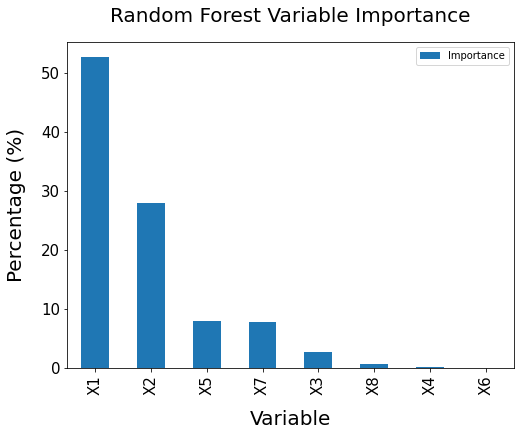

In [73]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

feature_importances.plot.bar(x = "variables",
                           y = "Importance", 
                             ax = ax)

ax.set_title("Random Forest Variable Importance",
            fontsize = 20,
            pad = 20)
ax.set_ylabel("Percentage (%)",
             fontsize = 20,
             labelpad = 15)
ax.set_xlabel("Variable",
             fontsize = 20,
             labelpad = 15)

ax.tick_params(axis = "both",
              which = "both",
              labelsize = 15)

Where we can see that the X1 variable is the most important variable, while the X8, X4 and X6 variables all appear as unimportant in determining the indepenent variable. It is interesting to note here, that all of these variables in most of the other models have also tended to seem unimportant as well, even in the linear relationships, which shows something consistent to a degree.

## Potential sources of information

https://medium.com/@alielagrebi/regularization-lasso-ridge-regression-105f426b749c

https://medium.com/@viveksalunkhe80/regularization-ridge-and-lasso-582ec7b3ad93

https://medium.com/all-about-ml/lasso-and-ridge-regularization-a0df473386d5 (Lasso and Ridge implementation)

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b (lasso and ridge implementtion)

https://scikit-learn.org/stable/modules/linear_model.html